___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import metrics
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances

In [14]:
df = pd.read_pickle("golden_data_dummy.pkl")

In [15]:
df

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,...,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.800000,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,...,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.600000,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,1.0,...,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.800000,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,...,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.800000,0,14500,3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,4.0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.100000,1,16790,3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,...,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,1798.0,165.0,1000,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,6.800000,0,39950,0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,7.0,0,1.0,...,0.0,1.0,1.0,0.0,1.0,0,0,1,0,0,

In [6]:
df.describe()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,...,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000
mean,1432.258843,88.231744,33894.105203,0.949767,0.080187,0.133422,0.126484,0.082188,0.859239,0.155704,...,0.030754,0.471781,0.000133,0.524149,0.003936,0.051634,0.067178,0.054236,0.090127,0.736825
std,271.764876,26.617304,37284.577857,0.218434,0.271591,0.340042,0.332405,0.274660,0.347786,0.362586,...,0.172656,0.499220,0.011550,0.499433,0.062616,0.221295,0.250339,0.226491,0.286373,0.440372
min,890.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1229.000000,66.000000,5000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1461.000000,85.000000,22487.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1598.000000,100.000000,49264.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2967.000000,294.000000,317000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.7 MB


In [18]:
df.isnull().sum()

displacement                  0
hp                            0
km                            0
ss_abs                        0
ss_adaptive_cruise_control    0
                             ..
type_Demonstration            0
type_Employee's car           0
type_New                      0
type_Pre-registered           0
type_Used                     0
Length: 136, dtype: int64

In [19]:
df.columns

Index(['displacement', 'hp', 'km', 'ss_abs', 'ss_adaptive_cruise_control',
       'ss_adaptive_headlights', 'ss_alarm_system', 'ss_blind_spot_monitor',
       'ss_central_door_lock', 'ss_central_door_lock_with_remote_control',
       ...
       'gearing_type_Semi-automatic', 'fuel_diesel', 'fuel_electric',
       'fuel_gasoline', 'fuel_lpg', 'type_Demonstration',
       'type_Employee's car', 'type_New', 'type_Pre-registered', 'type_Used'],
      dtype='object', length=136)

In [ ]:
# df.corr()

In [ ]:
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(), annot=True)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [24]:
X = df.drop("price", axis=1)
y = df.price


In [ ]:
# X.head()

In [ ]:
# y.head()

In [28]:
# from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [33]:
scores = cross_val_score(LinearRegression(), X, y, cv=10, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.3s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


In [34]:
scores

array([ 0.59042986,  0.71154933,  0.64580494,  0.9171428 ,  0.85813952,
        0.46554855, -0.30838312,  0.82408633,  0.7814386 ,  0.66493703])

In [35]:
scores.mean()

0.6150693838292547

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

In [39]:
X_train.shape

(11992, 135)

In [40]:
X_test.shape

(2998, 135)

In [41]:
lm_cross_val = pd.DataFrame(cross_validate(LinearRegression(), X_train, y_train, cv=10, n_jobs=-1, verbose=2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


In [42]:
lm_cross_val

,fit_time,score_time,test_score
0,0.101092,0.001001,8.751176e-01
1,0.061055,0.001001,8.898028e-01
2,0.096088,0.001000,8.976510e-01
3,0.099090,0.001002,8.877536e-01
4,0.062056,0.001002,8.927950e-01
5,0.095086,0.001001,-4.021901e+22
6,0.139126,0.001001,8.866205e-01
7,0.141128,0.001000,8.905761e-01
8,0.124113,0.001001,-1.405838e+24
9,0.137125,0.001001,8.854459e-01


In [43]:
lm_cross_val.test_score.mean()

-1.4460574122700986e+23

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = lm.predict(X_test)

In [47]:
lm.score(X_train, y_train)

0.8925010483331641

In [48]:
lm.score(X_test, y_test)

0.8848180219384115

In [50]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
displacement,-2.677749e+02
hp,2.584528e+03
km,-1.408138e+03
ss_abs,-1.924437e+01
ss_adaptive_cruise_control,1.520355e+01
...,...
type_Demonstration,-8.563240e+13
type_Employee's car,-9.800490e+13
type_New,-8.866573e+13
type_Pre-registered,-1.122801e+14


In [51]:
lm.intercept_

17740.461256599625

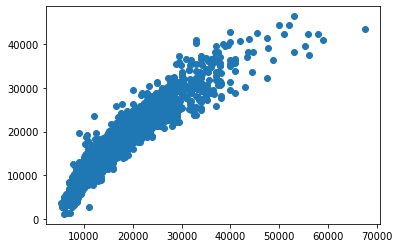

In [52]:
plt.scatter(y_test, y_pred)

In [56]:
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [57]:
print_evaluate(y_test, y_pred)

MAE: 1680.921854256151
MSE: 5855394.419788765
RMSE: 2419.792226574167
R2 Square 0.8848180219384115


In [60]:
final_scores = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'R2_Score'], data=[1680.921854256151,5855394.419788765,2419.792226574167,0.8848180219384115], columns=['LinearModel'])
final_scores

,LinearModel
MAE,1.680922e+03
MSE,5.855394e+06
RMSE,2.419792e+03
R2_Score,8.848180e-01


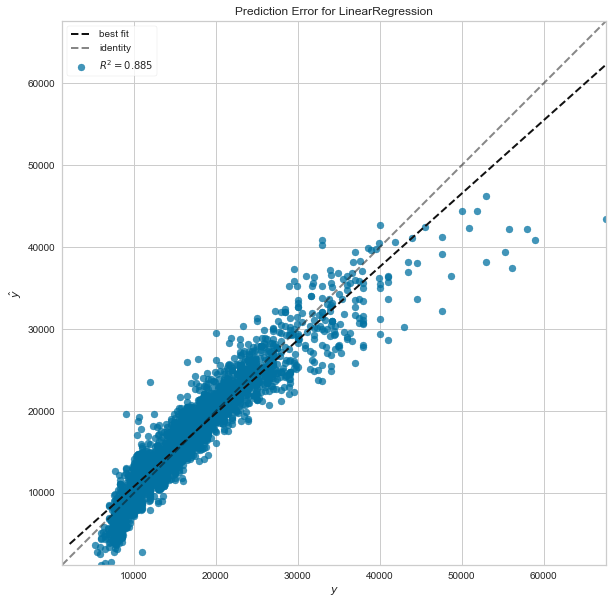

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [62]:
plt.figure(figsize=(10, 10))
visualizer = PredictionError(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

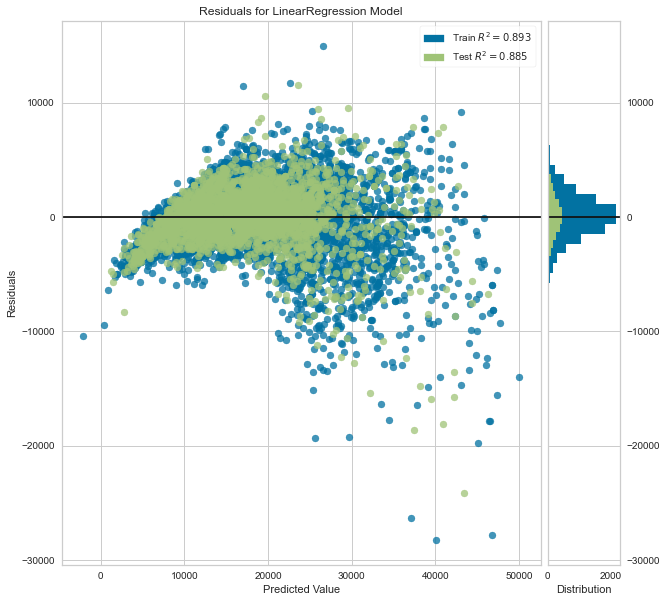

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [63]:
plt.figure(figsize=(10, 10))
model = ResidualsPlot(LinearRegression())
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.show()

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [ ]:
# from sklearn.linear_model import Ridge

In [65]:
rm = Ridge(alpha=100, random_state=101)

In [66]:
rm.fit(X_train, y_train)

Ridge(alpha=100, random_state=101)

In [67]:
rm_pred = rm.predict(X_test)

In [68]:
rm.score(X_train, y_train)

0.8924425312343209

In [69]:
rm.score(X_test, y_test)

0.8845711649347714

In [70]:
alpha_space = np.linspace(0.01, 40, 300)

In [71]:
alpha_dict = {'alpha': alpha_space}

In [72]:
clf = GridSearchCV(Ridge(random_state=101), alpha_dict, n_jobs=-1, verbose=2)

In [73]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(estimator=Ridge(random_state=101), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 1.43745819e-01, 2.77491639e-01, 4.11237458e-01,
       5.44983278e-01, 6.78729097e-01, 8.12474916e-01, 9.46220736e-01,
       1.07996656e+00, 1.21371237e+00, 1.34745819e+00, 1.48120401e+00,
       1.61494983e+00, 1.74869565e+00, 1.88244147e+00, 2.01618729e+00,
       2.14993311e+00, 2.28367893e...
       3.69238462e+01, 3.70575920e+01, 3.71913378e+01, 3.73250836e+01,
       3.74588294e+01, 3.75925753e+01, 3.77263211e+01, 3.78600669e+01,
       3.79938127e+01, 3.81275585e+01, 3.82613043e+01, 3.83950502e+01,
       3.85287960e+01, 3.86625418e+01, 3.87962876e+01, 3.89300334e+01,
       3.90637793e+01, 3.91975251e+01, 3.93312709e+01, 3.94650167e+01,
       3.95987625e+01, 3.97325084e+01, 3.98662542e+01, 4.00000000e+01])},
             verbose=2)

In [74]:
clf.best_params_

{'alpha': 21.141839464882946}

In [75]:
clf.best_score_

0.8884176019418977

In [76]:
rm = Ridge(alpha=21.14183, random_state=101)

In [77]:
rm.fit(X_train, y_train)

Ridge(alpha=21.14183, random_state=101)

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## 7. Visually Compare Models Performance In a Graph

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___